In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
data  = load_breast_cancer()

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [36]:
confusion_matrix(y_test, model.predict(X_test))

array([[50,  4],
       [ 2, 87]])

In [37]:
tn, fp, fn, tp = confusion_matrix(y_test, model.predict(X_test)).ravel()

In [38]:
print(tn, fp, fn, tp)

50 4 2 87


In [39]:
sensitivity = tp / tp + fn
specificity = tn / tn + fp
precision = tp / tp + fp

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

Sensitivity: 3.0
Specificity: 5.0
Precision: 5.0


In [47]:
fpr, tpr, thlds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

In [59]:
print("False Positive Rate:", fpr)
print("True Positive Rate:", tpr)
print("Thresholds:", thlds)

False Positive Rate: [0.         0.         0.         0.01851852 0.01851852 0.07407407
 0.07407407 1.        ]
True Positive Rate: [0.         0.01123596 0.93258427 0.93258427 0.97752809 0.97752809
 1.         1.        ]
Thresholds: [1.99972334e+00 9.99723343e-01 8.52305971e-01 8.43242498e-01
 7.38933728e-01 5.08813146e-01 2.52155639e-01 1.56685872e-29]


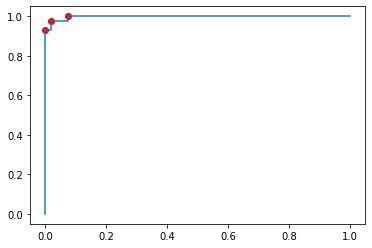

In [75]:
plt.plot(fpr, tpr)
plt.scatter([fpr[2], fpr[4], fpr[6]], [tpr[2], tpr[4], tpr[6]], color='r')
plt.show()